# Задание 1 [2 балла]
#### Средствами matplotlib напишите код, который один-в-один воспроизведет данное изображение.
##### 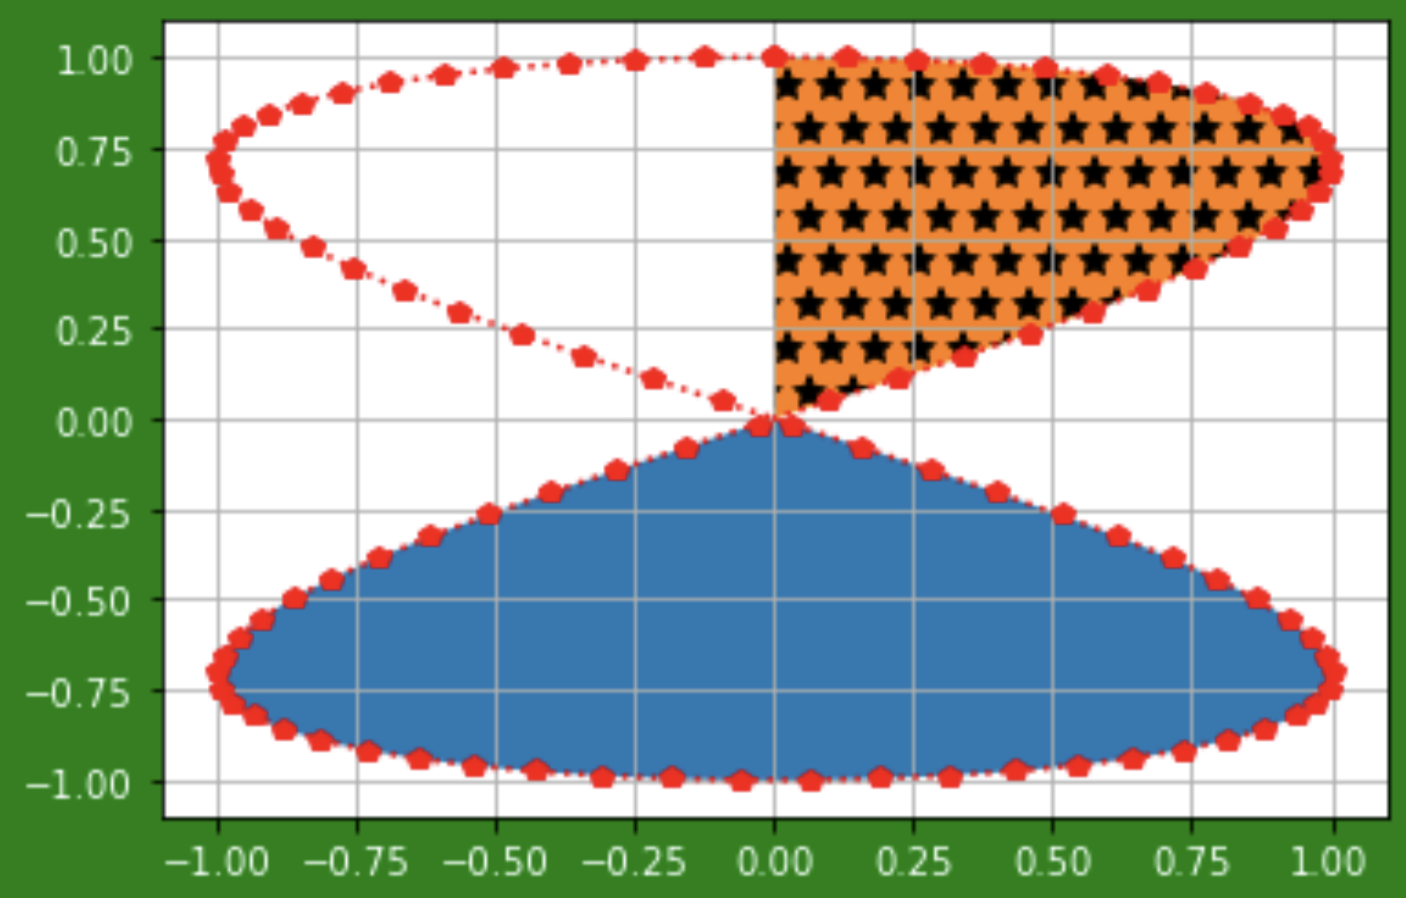

In [1]:
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Elf\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Elf\anaconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\Elf\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (10,8)
# plt.rcParams['xtick.color'] = 'white'
# plt.rcParams['ytick.color'] = 'white'

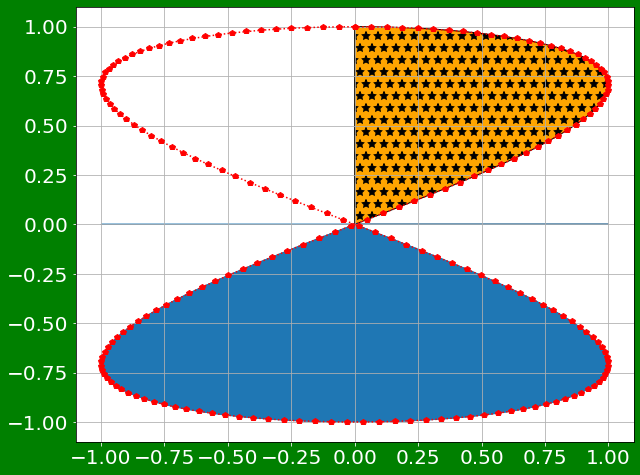

In [24]:
t = np.linspace(-2 * np.pi, 2 * np.pi, 200)
t_stars = np.linspace(0, np.pi / 2, 100)

x = np.sin(2 * t)
y = np.cos(1 * t)

fig = plt.figure()
fig.patch.set_facecolor('green')

plt.xticks(fontsize=20, c='white')
plt.yticks(fontsize=20, c='white')

plt.fill_between(np.sin(2 * t_stars), np.cos(1 * t_stars), interpolate=True, color='orange', hatch="*", edgecolor='black')
plt.fill_between(x, y, where=(y < 0), interpolate=True, color='tab:blue')

plt.plot(x, y,'--p', color='red', dashes=(1,4))
plt.grid()

# Задание 2 [3 балла]
#### Напишите функцию, которая осуществляет SQL запросы над pandas-dataframe. Протестируйте ее на предложенном наборе данных

In [4]:
import pandas as pd
import scipy.stats as sps
d1 = {'one': pd.Series(range(6), index=list('abcdef')),
     'two': pd.Series(range(7), index=list('abcdefg')),
     'three': pd.Series(sps.norm.rvs(size=7), index=list('abcdefg'))}
df1 = pd.DataFrame(d1).reset_index()
df1

,index,one,two,three
0,a,0.0,0,-0.131582
1,b,1.0,1,-0.006582
2,c,2.0,2,-0.425172
3,d,3.0,3,0.315267
4,e,4.0,4,-0.466325
5,f,5.0,5,-0.542206
6,g,NaN,6,-0.168971


In [5]:
import pandas as pd
import scipy.stats as sps
d2 = {'second_index': pd.Series(['a', 'b', 'd', 'c', 'd', 'c', 'k', 'l']),
     'four': pd.Series(range(10, 18)),
     'five': pd.Series(sps.norm.rvs(size=8))}
df2 = pd.DataFrame(d2)
df2

,second_index,four,five
0,a,10,1.979946
1,b,11,1.808255
2,d,12,-1.418477
3,c,13,-0.191666
4,d,14,-1.033811
5,c,15,-0.740470
6,k,16,0.357854
7,l,17,-0.250290


### Пример формата запроса:

SELECT tab1.column1 as c1, tab2.column2 as c2, tab1.column1+tab2.column2 as sum12
FROM tab1 RIGHT JOIN tab2 ON tab1.ind1=tab2.ind2
WHERE tab2.four>5 ORDER BY tab2.column3 ASC, tab1.column4 DESC

Реализовать какой-то больший функционал, чем указан в примере запроса не нужно. Общий функционал: новые имена столбцов, арифметические операции на столбцах, объединение таблиц (не только правое!), фильтр по условию, сортировка.

Чтобы легче было парсить, считаем, что пользователь всегда пишет запрос красиво и корректно (как в примере).

In [6]:
query = \
"""
SELECT df1.one as c1, df2.five as c2, df1.three+df2.four as sum12
FROM df1 JOIN df2 ON tab1.index=tab2.second_index
WHERE df2.one>=2
ORDER BY df2.five ASC, df1.two DESC
"""

In [7]:
tab_dict = {'df1': df1, 'df2': df2}

In [8]:
ops = {"+": (lambda x,y: x+y), 
        "-": (lambda x,y: x-y),
        "*": (lambda x,y: x*y),
        "<": (lambda x,y: x<y),
        "<=": (lambda x,y: x<=y),
        ">": (lambda x,y: x>y),
        ">=": (lambda x,y: x>=y),
        "==": (lambda x,y: x==y)}

In [185]:
def SQL_query(query, tab_dict):
    lines = []
    for el in query.split('\n'):
        if el != '':
            lines.append(el)

    # первой идет from
    if 'FROM' in query:
        if 'LEFT JOIN' in lines[1]:
            obj_1, obj_2 = lines[1].split(' JOIN ')

            join_arg_1 = obj_1.split(' ')[-1]
            join_arg_2, join_rule = obj_2.split(' ON ')

            col_1, col_2 = join_rule.split('=')

            buf_db = tab_dict[join_arg_1].merge(tab_dict[join_arg_2], 
                                                  left_on=col_1.split('.')[-1], 
                                                  right_on=col_2.split('.')[-1],
                                                  how='left')
        if 'RIGHT JOIN' in lines[1]:
            obj_1, obj_2 = lines[1].split(' JOIN ')

            join_arg_1 = obj_1.split(' ')[-1]
            join_arg_2, join_rule = obj_2.split(' ON ')

            col_1, col_2 = join_rule.split('=')

            buf_db = tab_dict[join_arg_1].merge(tab_dict[join_arg_2], 
                                                  left_on=col_1.split('.')[-1], 
                                                  right_on=col_2.split('.')[-1],
                                                  how='right')
        if 'OUTER JOIN' in lines[1]:
            obj_1, obj_2 = lines[1].split(' JOIN ')

            join_arg_1 = obj_1.split(' ')[-1]
            join_arg_2, join_rule = obj_2.split(' ON ')

            col_1, col_2 = join_rule.split('=')

            buf_db = tab_dict[join_arg_1].merge(tab_dict[join_arg_2], 
                                                  left_on=col_1.split('.')[-1], 
                                                  right_on=col_2.split('.')[-1],
                                                  how='outer')
            
        if 'JOIN' in lines[1]:
            obj_1, obj_2 = lines[1].split(' JOIN ')

            join_arg_1 = obj_1.split(' ')[-1]
            join_arg_2, join_rule = obj_2.split(' ON ')

            col_1, col_2 = join_rule.split('=')

            buf_db = tab_dict[join_arg_1].merge(tab_dict[join_arg_2], 
                                                  left_on=col_1.split('.')[-1], 
                                                  right_on=col_2.split('.')[-1],
                                                  how='inner')
        else:
            # обычный from
            buf_db = lines[1].split(' FROM')[-1]

    if 'WHERE' in query:
        where_cond = lines[2].split('WHERE ')[-1]
        op_buf = ''
        for op in ops:
            if op in where_cond:
                if len(op) > len(op_buf):
                    op_buf = op
        arg_1, arg_2 = where_cond.split(op_buf)

        df, col = arg_1.split('.')
        buf_db = buf_db[ops[op_buf](buf_db[col], float(arg_2))]

    if 'ORDER BY' in query:
        order_cond = lines[3].split('ORDER BY ')[-1].split(', ')
        for cond in order_cond:
            col, is_asc = cond.split(' ')
            buf_db.sort_values(by=col.split('.')[-1], ascending=('ASC' in is_asc))

    # SELECT
    result_db = pd.DataFrame()
    for select_cond in lines[0].split('SELECT ')[-1].split(', '):
        orig, col_name = select_cond.split(' as ')

        op_buf = ''
        op_flag = False
        for op in ops:
            if op in orig:
                if len(op) > len(op_buf):
                    op_buf = op
                    arg_1, arg_2 = orig.split(op_buf)
                    result_db[col_name] = ops[op_buf](buf_db[arg_1.split('.')[-1]], buf_db[arg_2.split('.')[-1]])
                    op_flag = True
                    break
        if not op_flag:
            result_db[col_name] = buf_db[orig.split('.')[-1]]
    return result_db

In [186]:
SQL_query(query, tab_dict)

,c1,c2,sum12
2,2.0,-0.191666,12.574828
3,2.0,-0.740470,14.574828
4,3.0,-1.418477,12.315267
5,3.0,-1.033811,14.315267


# Задание 3 [5 баллов] 
#### Творческое задание 
Вам дан набор данных (HW2.csv) с различной информацией о клиентах банка. Мы хотим выдвинуть гипотезы о сигналах, которые говорят, что клиент может уйти из нашего банка. Флаг ухода (таргет, целевая переменная) - переменная Attrition_Flag.

Необходимо провести исследовательский анализ данных и изучить взаимосвязь между целевой переменной и всеми остальными средствами Pandas и Seaborn [NumPy и Matplotlib могут идти как вспомогательные] (всякий ML сюда прикручивать не надо - на оценку это не повлияет), а также сами переменные.

Здесь очень сильно будет оцениваться описательная часть (что и зачем вы сделали и что увидели) и какие выводы получили по результатам анализа, а также масштаб использования функций Pandas и Seaborn.

In [24]:
import seaborn as sns

sns.set_style('whitegrid')

In [25]:
df = pd.read_csv('HW2.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


Для удобства надо бы провести one-hot encoding целевого показателя

In [26]:
df.Attrition_Flag = pd.get_dummies(df['Attrition_Flag'])['Attrited Customer']
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,1,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,1,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,1,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


Колонки с длинными названиями видимо отвечают за ответы неких классификаторов, которые при этом хорошо натренировались, ибо они сильно скорреллированны.

In [27]:
pd.DataFrame(df['Attrition_Flag']).join(df[df.columns[-2:]]).corr()

,Attrition_Flag,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
Attrition_Flag,1.000000,0.999989,-0.999989
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,0.999989,1.000000,-1.000000
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,-0.999989,-1.000000,1.000000


Так как у нас задача анализировать данные, то я сброшу две эти колонки (чтобы не мешали) и рассмотрю остальные признаки

In [28]:
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

In [29]:
df_num = pd.get_dummies(df)
df_num.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,0,45,3,39,5,1,3,12691.0,777,...,0,0,1,0,0,0,1,0,0,0
1,818770008,0,49,5,44,6,1,2,8256.0,864,...,0,0,0,0,1,0,1,0,0,0
2,713982108,0,51,3,36,4,1,0,3418.0,0,...,0,0,0,1,0,0,1,0,0,0
3,769911858,0,40,4,34,3,4,1,3313.0,2517,...,0,0,0,0,1,0,1,0,0,0
4,709106358,0,40,3,21,5,1,0,4716.0,0,...,0,0,1,0,0,0,1,0,0,0


# Две группы
Будем параллельно смотреть на две группы: те кто ушел и оставшиеся
## Возраст
Рассмотрим данный параметр

<AxesSubplot: >

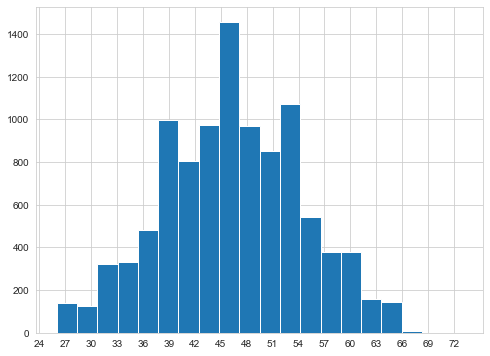

In [71]:
plt.xticks(np.arange(0, 74, 3))
df['Customer_Age'].hist(bins=20)

Понятно, доминируют люди 40-50 лет, рассмотрим группу ушедших

<AxesSubplot: title={'center': 'Still here'}>

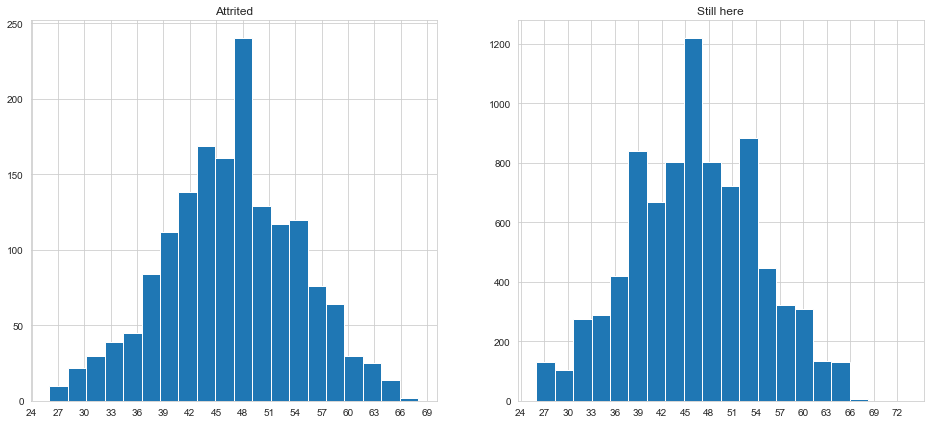

In [69]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(16, 7)

ax[0].set_title('Attrited')
ax[1].set_title('Still here')

ax[0].set_xticks(np.arange(0, 74, 3))
ax[1].set_xticks(np.arange(0, 74, 3))

df[df['Attrition_Flag'] == 1]['Customer_Age'].hist(ax=ax[0], bins=20)
df[df['Attrition_Flag'] == 0]['Customer_Age'].hist(ax=ax[1], bins=20)

Хм, среди ушедших особо выделяются те, кому 48 лет, хотя они по идее не являются самой популярной категорией в общем числе клиентов

In [72]:
df_num[['Customer_Age', 'Attrition_Flag']].corr()

,Customer_Age,Attrition_Flag
Customer_Age,1.000000,0.018203
Attrition_Flag,0.018203,1.000000


Корреляция несильная

## Образование
Большинство имеет высшее

<AxesSubplot: >

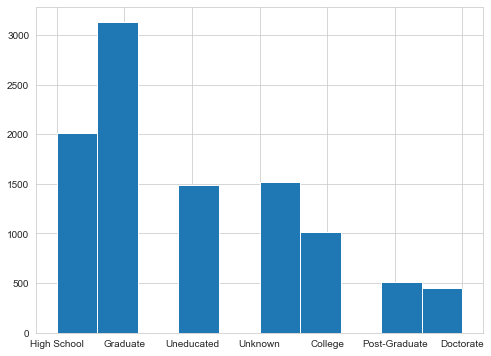

In [33]:
df['Education_Level'].hist()

<AxesSubplot: title={'center': 'Still here'}>

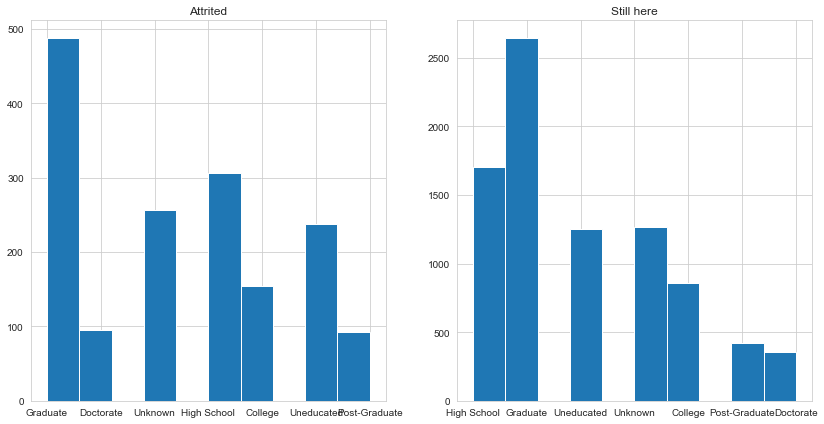

In [74]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(14, 7)

ax[0].set_title('Attrited')
ax[1].set_title('Still here')

# ax[0].set_xticks(np.arange(0, 74, 3))
# ax[1].set_xticks(np.arange(0, 74, 3))

df[df['Attrition_Flag'] == 1]['Education_Level'].hist(ax=ax[0])
df[df['Attrition_Flag'] == 0]['Education_Level'].hist(ax=ax[1])

Здесь мало что ясно, посмотрим корреляцию

In [96]:
# Посмотрим скоррелированность
df_corr = pd.DataFrame(df_num.corr()['Attrition_Flag'].abs().sort_values()[::-1][:10])
df_corr

,Attrition_Flag
Attrition_Flag,1.000000
Total_Trans_Ct,0.371403
Total_Ct_Chng_Q4_Q1,0.290054
Total_Revolving_Bal,0.263053
Contacts_Count_12_mon,0.204491
Avg_Utilization_Ratio,0.178410
Total_Trans_Amt,0.168598
Months_Inactive_12_mon,0.152449
Total_Relationship_Count,0.150005
Total_Amt_Chng_Q4_Q1,0.131063


Попробуем бахнуть большущий график с данными

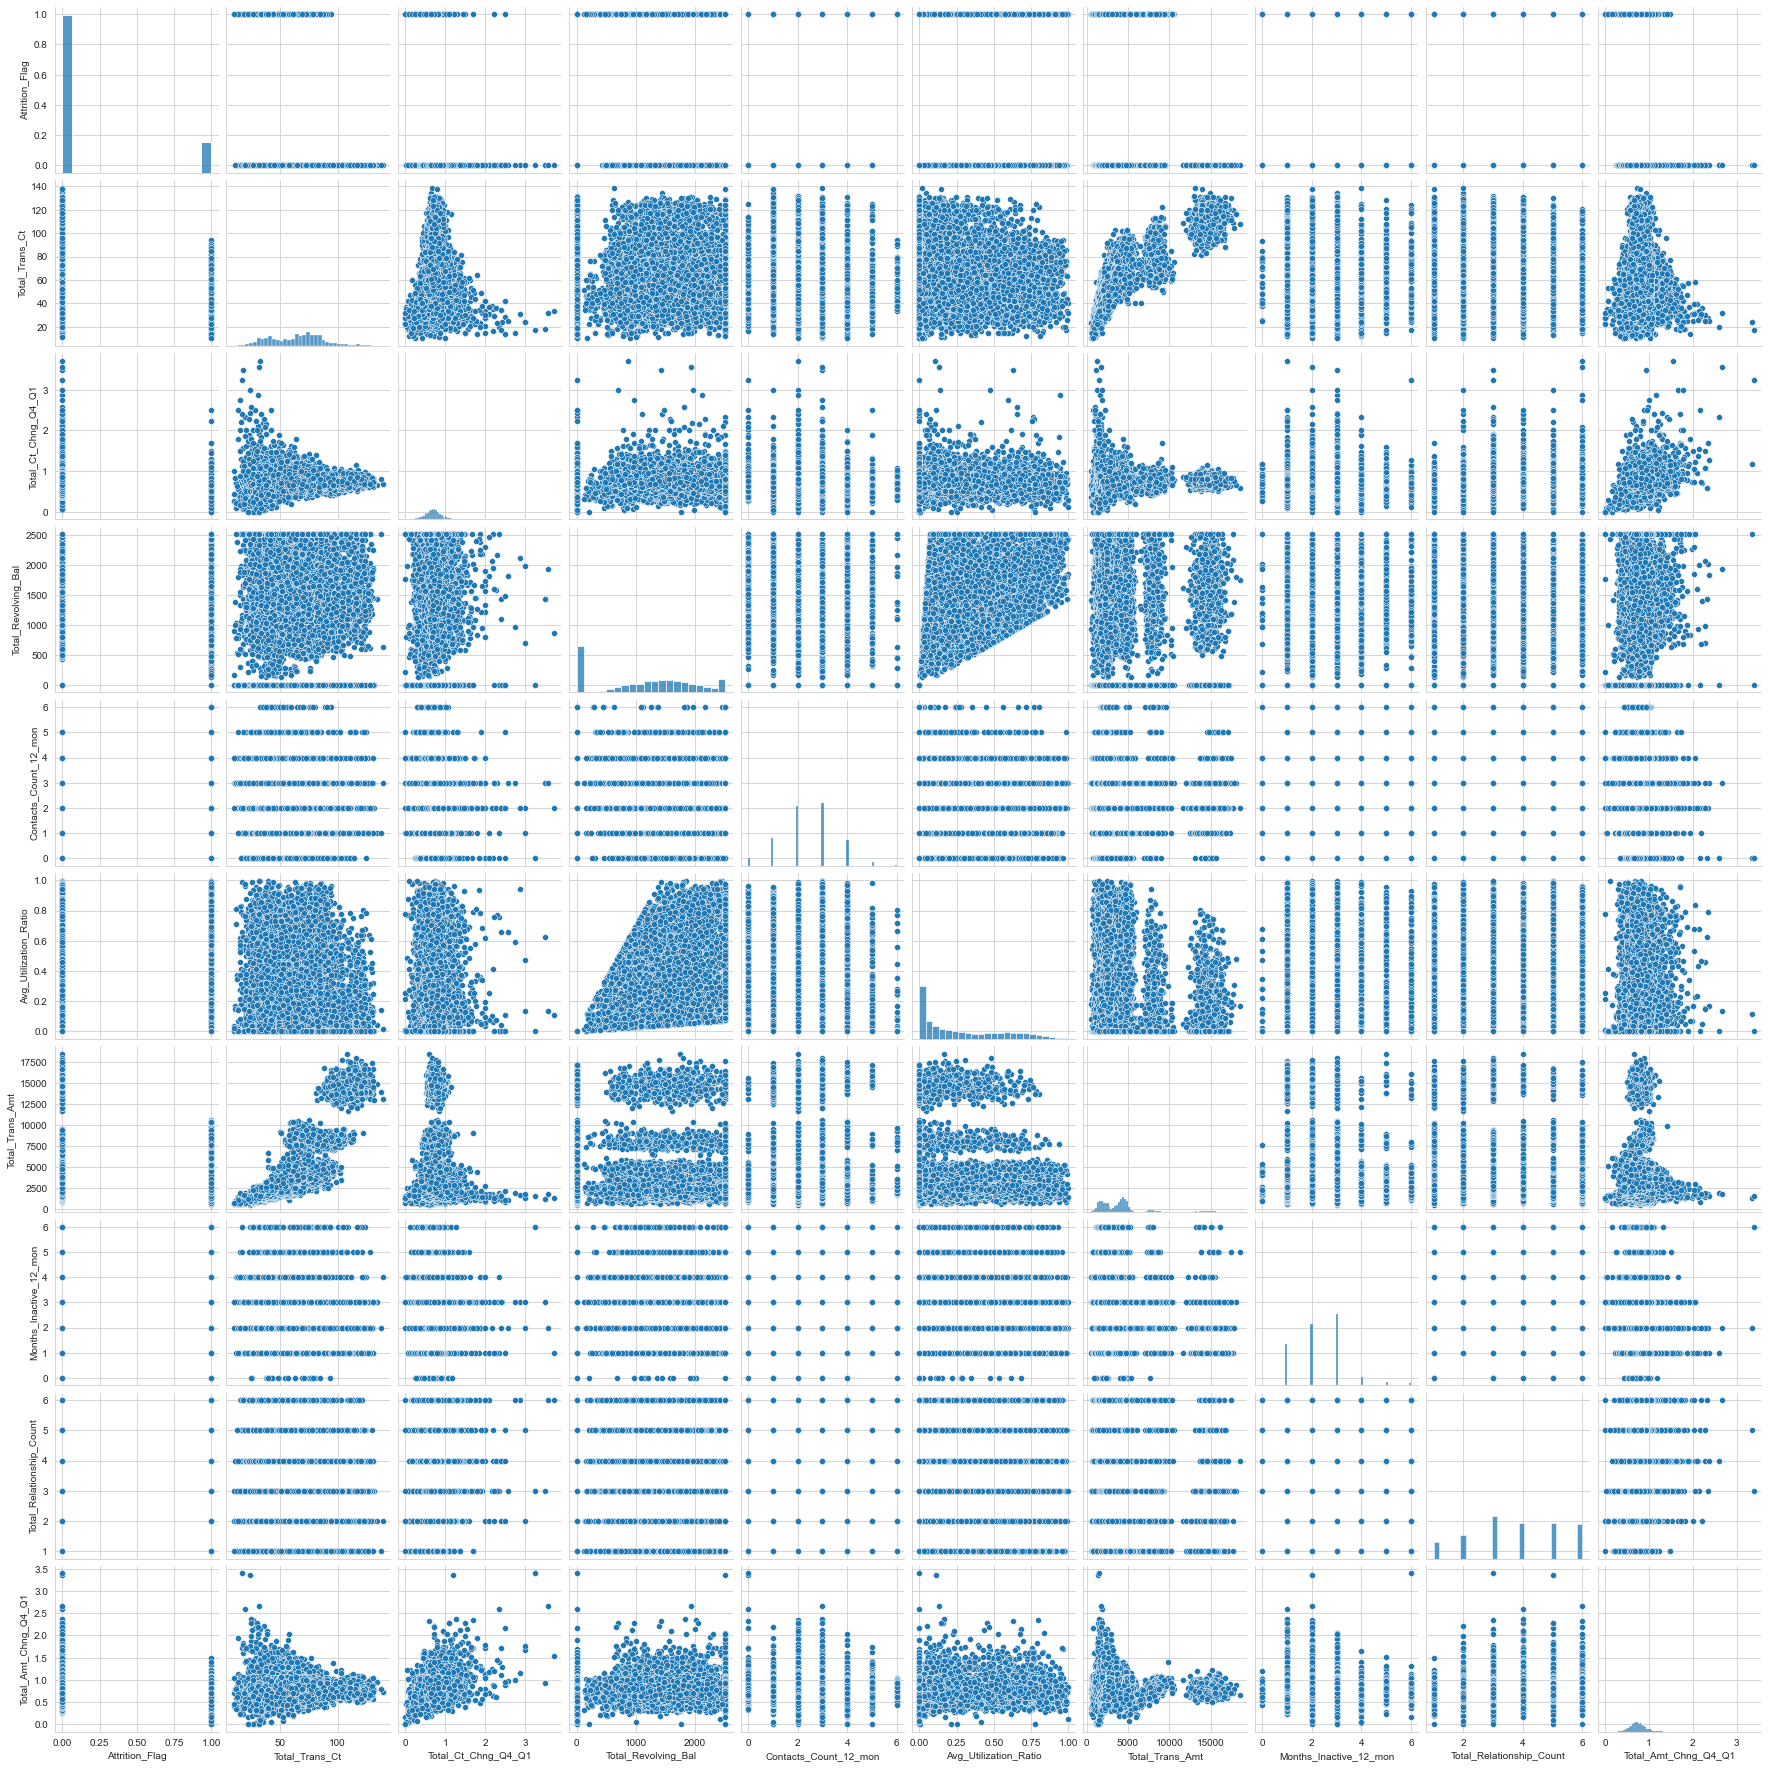

In [99]:
sns.pairplot(df_num[df_corr.index])

Видно, что у некоторых параметров есть скоррелированность, но с целевым параметром особо никто не коррелирует

## Пройдемся по параметрам
Будем тогда просто выделять интересные признаки\
Total_Trans_Ct в райное 40 у большинства ушедших клиентов

Total_Trans_Ct


<AxesSubplot: title={'center': 'Still here'}>

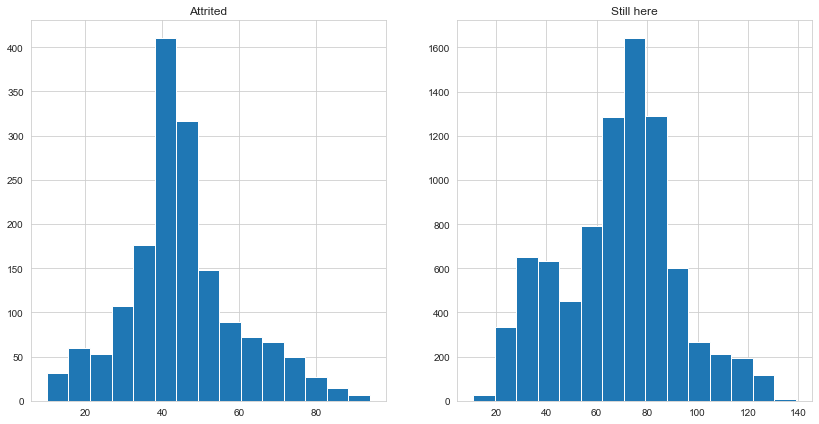

In [111]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(14, 7)

ax[0].set_title('Attrited')
ax[1].set_title('Still here')

# ax[0].set_xticks(np.arange(0, 74, 3))
# ax[1].set_xticks(np.arange(0, 74, 3))
col_name = df_corr.index[1]
print(col_name)
df[df['Attrition_Flag'] == 1][col_name].hist(ax=ax[0], bins=15)
df[df['Attrition_Flag'] == 0][col_name].hist(ax=ax[1], bins=15)

Что-то интересное: если Total_Revolving_Bal между 500 и 2000, то клиент с меньшей вероятностью будет в числе упущенных

Total_Revolving_Bal


<AxesSubplot: title={'center': 'Still here'}>

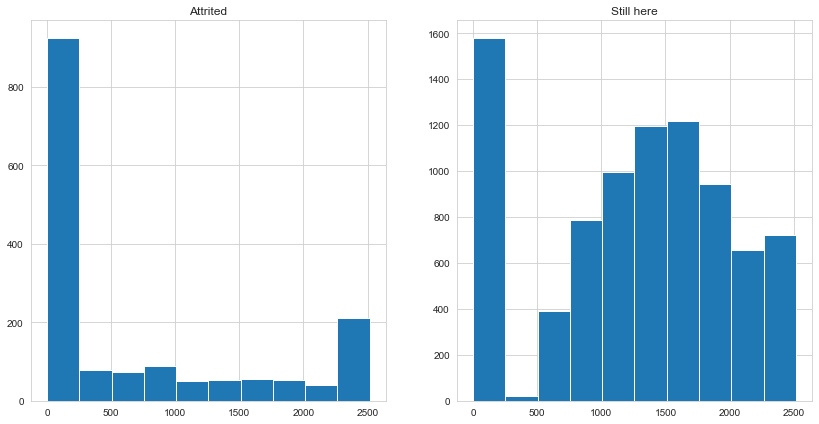

In [134]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(14, 7)

ax[0].set_title('Attrited')
ax[1].set_title('Still here')

# ax[0].set_xticks(np.arange(0, 74, 3))
# ax[1].set_xticks(np.arange(0, 74, 3))
col_name = df.columns[14]
print(col_name)
df[df['Attrition_Flag'] == 1][col_name].hist(ax=ax[0])
df[df['Attrition_Flag'] == 0][col_name].hist(ax=ax[1])

У большинства ушедших клиентов Total_Trans_Amt не превышает 2400, можно принять к сведению

Total_Trans_Amt


<AxesSubplot: title={'center': 'Still here'}>

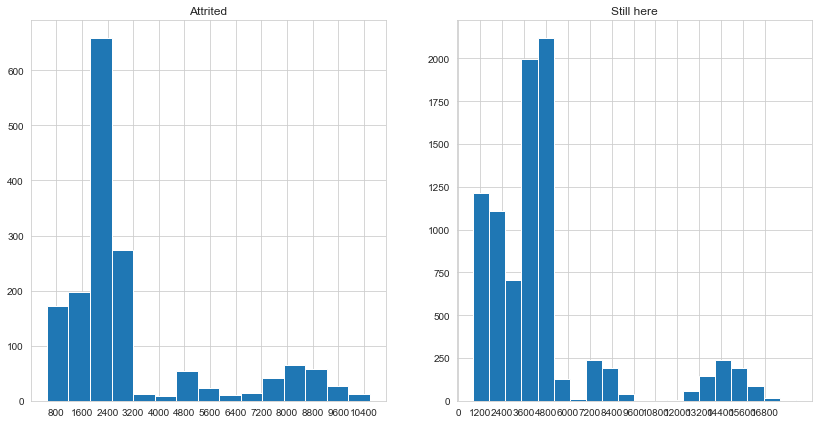

In [152]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(14, 7)

ax[0].set_title('Attrited')
ax[1].set_title('Still here')

ax[0].set_xticks(np.arange(0, 17000, 800))
ax[1].set_xticks(np.arange(0, 17000, 1200))

col_name = df.columns[17]
print(col_name)
df[df['Attrition_Flag'] == 1][col_name].hist(ax=ax[0], bins=15)
df[df['Attrition_Flag'] == 0][col_name].hist(ax=ax[1], bins=20)

Большинство ушедших пользователей имело Total_Trans_Ct в райное между 30 и 60, норма находится повыше

Total_Trans_Ct


<AxesSubplot: title={'center': 'Still here'}>

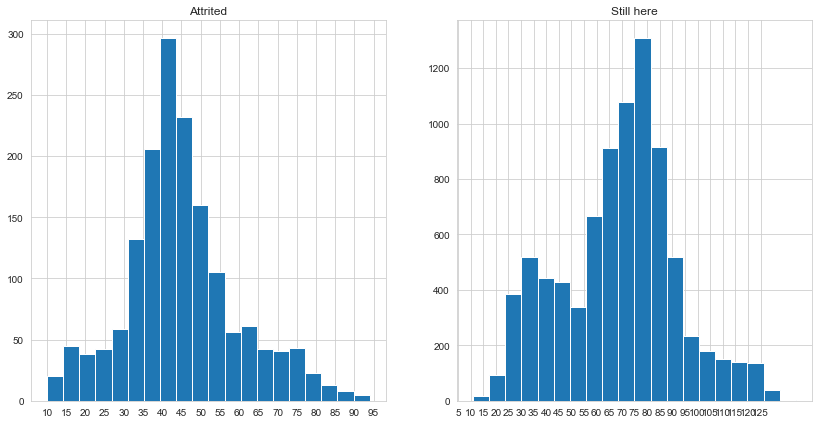

In [165]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(14, 7)

ax[0].set_title('Attrited')
ax[1].set_title('Still here')

ax[0].set_xticks(np.arange(0, 100, 5))
ax[1].set_xticks(np.arange(0, 130, 5))

col_name = df.columns[18]
print(col_name)
df[df['Attrition_Flag'] == 1][col_name].hist(ax=ax[0], bins=20)
df[df['Attrition_Flag'] == 0][col_name].hist(ax=ax[1], bins=20)

# Паспорт клиента, который вот-вот уйдет (потенциально)
Ему около 48 лет, у него высшее (большая часть клиентской базы такая, хех)\
Total_Trans_Ct в райное 40\
Total_Trans_Amt не превышает 2400\
Total_Trans_Ct в райное между 30 и 60